# *Twitter Sentiment Analysis using Twitter API*

### Project Outline:
1. Importing the Libraries
2. Authentication
3. Connecting with Twitter API and extracting the data
4. Creating a DataFrame of all the Tweets
5. Cleaning the Dataset
6. Analyzing the Data with TextBlob

### Step-1 : Installing the Libraries

In [1]:
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from wordcloud import WordCloud, STOPWORDS


### Step-2: Authentication

In [2]:
# Twitter Api Credentials
# Establish Connecion
# Get from developers.twitter.com/App->Setting->keys&tokens

consumerKey = 'bg1cggERbv8fAsiuRIgtRboi4'
consumerSecretKey = 'TLRSGZL0kA2eI90WTeHALXHMps7dM1HhSfqfpZhA7h3zOWadgb'
accessToken = '1504802750408048644-3GInw7mDst6YZ3QKv8om40fFZxXvAo'
accessTokenSecret = '9unNUBwLIE3KOAVOq4rx0yPiUMMjbJm5qVCBFlMxYdEEf'


Note: **Tweepy** is a popular package in Python for interacting with the Twitter API. Recently, the version 4.0 of this package was released that supports the Twitter API v2.

In [3]:
# Authentication object creation
api = tweepy.Client(consumer_key= consumerKey,consumer_secret= consumerSecretKey,access_token= accessToken,access_token_secret= accessTokenSecret,bearer_token='AAAAAAAAAAAAAAAAAAAAAAFibQEAAAAAbFA0e1usx8DQDGYooccqszo5ihI%3DOaDClCxv7UA8Wkr4zNSj7NwEeStUpGiOqORGZd7mLPbTLECOaq')

### Step-3: Getting the Tweets

In [4]:
keyword = input("Enter the hashtag to search: ")
count = int(input("Enter the number of tweets to be analyzed: "))

Enter the hashtag to search: India
Enter the number of tweets to be analyzed: 15


In [5]:

posts = [tweet.text for tweet in tweepy.Paginator(api.search_recent_tweets, query='{} lang:en'.format(keyword),
                              tweet_fields=['context_annotations', 'created_at'], max_results=100).flatten(limit=count) ]

In [6]:
posts[:10]

['RT @s_shreyatweets: Cost of having non-veg food in JNU , Delhi, India- The world’s largest democracy 😡👇 https://t.co/R3sD5ONSzd',
 'RT @kaushikrj6: A BJP MLA singing a song whose lyrics are "We have to kick those people out of India who don\'t chant Ram\'s name".',
 '@majorgauravarya @BSF_India @ITBP_official @nsgblackcats Condolences to your entire family🙏',
 'Rehan Siddiqui is an event manager &amp; owner of a radio channel in US. #Rehan is working on the behest of  ISI and used his radio channel as a platform to run Anti-India propaganda. @SufiSartaaj must have to cancel his show organized by #Rehan. #BoycottSartaaj https://t.co/pZKi8z7lvL',
 '@_aruntripathi @Abduls_view @deltavega2 @rajgopal88 I think you lived in Taliban not in India, as we Indian Muslims are criticized by Pakistan since the partition that we do not do such things to be powerful, and if we start counting what Indian Hindus has done against Indian Muslims till date will be countless.',
 "RT @ChristianFrueh1: Why 

In [7]:
# Getting the tweets
i=1
for post in posts:
    print(str(i) + '. ' + post + '\n')
    i=i+1

1. RT @s_shreyatweets: Cost of having non-veg food in JNU , Delhi, India- The world’s largest democracy 😡👇 https://t.co/R3sD5ONSzd

2. RT @kaushikrj6: A BJP MLA singing a song whose lyrics are "We have to kick those people out of India who don't chant Ram's name".

3. @majorgauravarya @BSF_India @ITBP_official @nsgblackcats Condolences to your entire family🙏

4. Rehan Siddiqui is an event manager &amp; owner of a radio channel in US. #Rehan is working on the behest of  ISI and used his radio channel as a platform to run Anti-India propaganda. @SufiSartaaj must have to cancel his show organized by #Rehan. #BoycottSartaaj https://t.co/pZKi8z7lvL

5. @_aruntripathi @Abduls_view @deltavega2 @rajgopal88 I think you lived in Taliban not in India, as we Indian Muslims are criticized by Pakistan since the partition that we do not do such things to be powerful, and if we start counting what Indian Hindus has done against Indian Muslims till date will be countless.

6. RT @ChristianFrueh1: Why d

### Step-4: Creating a DataFrame of the Tweets

In [8]:
# Creating a DataFrame of Tweets
tweets_data = pd.DataFrame([post for post in posts], columns=['Tweets'])

In [9]:
tweets_data

,Tweets
0,RT @s_shreyatweets: Cost of having non-veg foo...
1,RT @kaushikrj6: A BJP MLA singing a song whose...
2,@majorgauravarya @BSF_India @ITBP_official @ns...
3,Rehan Siddiqui is an event manager &amp; owner...
4,@_aruntripathi @Abduls_view @deltavega2 @rajgo...
5,RT @ChristianFrueh1: Why did Pfizer back out o...
6,RT @RamanRescueteam: Salute The Spirit Of Thes...
7,"RT @ashoswai: During Ram Navmi, Hindu Right Wi..."
8,@PavSrda @MSLovellJnr @Ukraine India and China...
9,"RT @AbhimanyuX_: In India, there is only one R..."


### Step-5: Cleaning the Dataset

In [10]:
tweets_data.drop_duplicates(inplace= True)

In [11]:
tweets_data

,Tweets
0,RT @s_shreyatweets: Cost of having non-veg foo...
1,RT @kaushikrj6: A BJP MLA singing a song whose...
2,@majorgauravarya @BSF_India @ITBP_official @ns...
3,Rehan Siddiqui is an event manager &amp; owner...
4,@_aruntripathi @Abduls_view @deltavega2 @rajgo...
5,RT @ChristianFrueh1: Why did Pfizer back out o...
6,RT @RamanRescueteam: Salute The Spirit Of Thes...
7,"RT @ashoswai: During Ram Navmi, Hindu Right Wi..."
8,@PavSrda @MSLovellJnr @Ukraine India and China...
9,"RT @AbhimanyuX_: In India, there is only one R..."


In [18]:
# Function to clean the tweets
def cleanText(text):
    text = re.sub('@[A-Za-z0-9]+','', text)
    text = re.sub('@_[A-Za-z0-9]+','', text)
    text = re.sub('#','',text)
    text = re.sub('RT[\s]+','',text)
    text = re.sub('http?:\/\/\S+','',text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(':+','',text)
    text = re.sub('_+','',text)
    return text.lower()

In [19]:
tweets_data['Tweets'] = tweets_data['Tweets'].apply(cleanText)
tweets_data

,Tweets
0,shreyatweets cost of having non-veg food in jn...
1,"a bjp mla singing a song whose lyrics are ""we..."
2,india official condolences to your entire fa...
3,rehan siddiqui is an event manager &amp; owner...
4,view i think you lived in taliban not in in...
5,why did pfizer back out of vaccine deal with ...
6,"salute the spirit of these brave hearts, who ..."
7,"during ram navmi, hindu right wing in india d..."
8,india and china? good luck with that.
9,"in india, there is only one religion. \n\nhin..."


### Step 6: Sentiment Analysis

Now, I can use cleaned text to calculate polarity, subjectivity, sentiment, negative, positive, neutral and compound parameters again.

In [20]:
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

tweets_data['Subjectivity'] = tweets_data['Tweets'].apply(get_subjectivity)
tweets_data['Polarity'] = tweets_data['Tweets'].apply(get_polarity)

In [21]:
tweets_data

,Tweets,Subjectivity,Polarity
0,shreyatweets cost of having non-veg food in jn...,0.000000,0.000000
1,"a bjp mla singing a song whose lyrics are ""we...",0.000000,0.000000
2,india official condolences to your entire fa...,0.625000,0.000000
3,rehan siddiqui is an event manager &amp; owner...,0.100000,-0.100000
4,view i think you lived in taliban not in in...,0.666667,0.100000
5,why did pfizer back out of vaccine deal with ...,0.375000,0.200000
6,"salute the spirit of these brave hearts, who ...",1.000000,0.800000
7,"during ram navmi, hindu right wing in india d...",0.535714,0.285714
8,india and china? good luck with that.,0.600000,0.700000
9,"in india, there is only one religion. \n\nhin...",1.000000,0.000000


### Step-7: Analysis

In [22]:
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'

tweets_data['Analysis_Outcome'] = tweets_data['Polarity'].apply(getAnalysis)

In [23]:
tweets_data

,Tweets,Subjectivity,Polarity,Analysis_Outcome
0,shreyatweets cost of having non-veg food in jn...,0.000000,0.000000,Neutral
1,"a bjp mla singing a song whose lyrics are ""we...",0.000000,0.000000,Neutral
2,india official condolences to your entire fa...,0.625000,0.000000,Neutral
3,rehan siddiqui is an event manager &amp; owner...,0.100000,-0.100000,Negative
4,view i think you lived in taliban not in in...,0.666667,0.100000,Positive
5,why did pfizer back out of vaccine deal with ...,0.375000,0.200000,Positive
6,"salute the spirit of these brave hearts, who ...",1.000000,0.800000,Positive
7,"during ram navmi, hindu right wing in india d...",0.535714,0.285714,Positive
8,india and china? good luck with that.,0.600000,0.700000,Positive
9,"in india, there is only one religion. \n\nhin...",1.000000,0.000000,Neutral


In [24]:
tweets_data['Analysis_Outcome'].value_counts()

Positive    8
Neutral     5
Negative    2
Name: Analysis_Outcome, dtype: int64

In [25]:
tweets_data.shape

(15, 4)

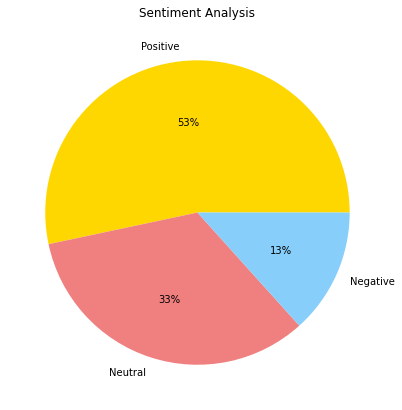

In [28]:
plt.figure(figsize=(10,7))
labels = ['Positive','Neutral','Negative']
colors = ['gold', 'lightcoral', 'lightskyblue']
plt.pie(tweets_data['Analysis_Outcome'].value_counts(), labels=labels, colors=colors, autopct='%.0f%%')
plt.title("Sentiment Analysis")
plt.show()

In [29]:
tweets_list_negative = tweets_data[tweets_data['Analysis_Outcome']=='Negative']
tweets_list_positive = tweets_data[tweets_data['Analysis_Outcome']=='Positive']
tweets_list_neutral = tweets_data[tweets_data['Analysis_Outcome']=='Neutral']


In [30]:
negatives = len(tweets_list_negative)
positives = len(tweets_list_positive)
neutral = len(tweets_list_neutral)

In [31]:
def createWordCloud(text):
    # Word Cloud Visualization
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color='white',
    max_words=3000,
    stopwords=stopwords,
    repeat=True)
    wc.generate(str(text))
    wc.to_file('wc.png')
    plt.imshow(wc, interpolation='bilinear')

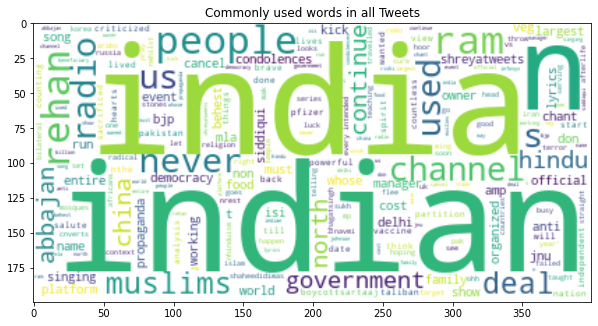

In [32]:
plt.figure(figsize=(10,8))
plt.title('Commonly used words in all Tweets')
createWordCloud(tweets_data['Tweets'].values)

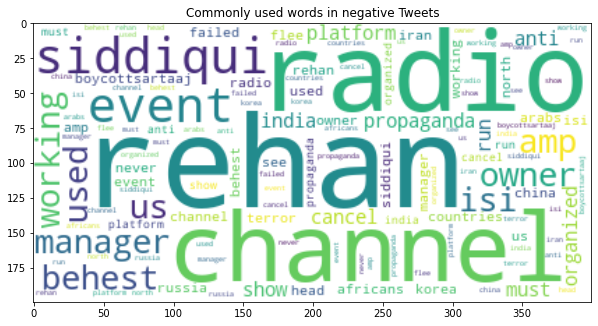

In [33]:
plt.figure(figsize=(10,8))
plt.title('Commonly used words in negative Tweets')
createWordCloud(tweets_list_negative['Tweets'].values)

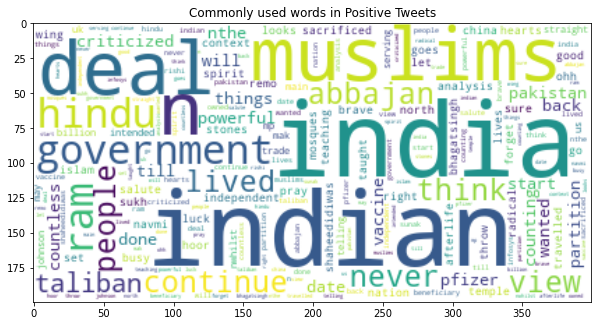

In [34]:
plt.figure(figsize=(10,8))
plt.title('Commonly used words in Positive Tweets')
createWordCloud(tweets_list_positive['Tweets'].values)

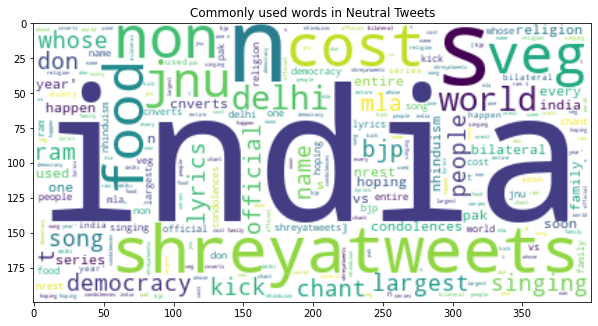

In [35]:
plt.figure(figsize=(10,8))
plt.title('Commonly used words in Neutral Tweets')
createWordCloud(tweets_list_neutral['Tweets'].values)